In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouseDrugData = pd.read_csv(mouse_drug_data_to_load)
df_clinicaTrial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
    # We convert column "Mouse ID" to Index
df_mouseDrugData.set_index('Mouse ID', inplace=True)

l_mouseIDinClinicaTrial = df_clinicaTrial["Mouse ID"].tolist()
l_drugInClinicaTrial = []
for mouseID in l_mouseIDinClinicaTrial:
    if mouseID == "g989":
        l_drugInClinicaTrial.append( "Propriva" )
    else:
        l_drugInClinicaTrial.append( df_mouseDrugData["Drug"][mouseID] )
df_clinicaTrial["Drug"] = l_drugInClinicaTrial
# Display the data table for preview
df_clinicaTrial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
l_drugsToAnalize = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
    # We create a new dataframe, only for our target: Only four drugs ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
df_clinicaTrialAnalize = df_clinicaTrial.loc[ df_clinicaTrial["Drug"].isin(l_drugsToAnalize) ]
    # reset index
df_clinicaTrialAnalize = df_clinicaTrialAnalize.reset_index()
    # We erase old index
del df_clinicaTrialAnalize["index"]
    # We creat a temporal dataframe for to capture grouped data
df_temp = df_clinicaTrialAnalize.loc[range(len(df_clinicaTrialAnalize)),["Timepoint", "Tumor Volume (mm3)", "Drug"]]
df_temp = df_temp[["Drug","Timepoint","Tumor Volume (mm3)"]]
df_temp.sort_values(["Drug","Timepoint"], ascending=[True,True])
df_ans1 = df_temp.groupby(["Drug","Timepoint"], as_index=True)["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
df_ans1 = pd.DataFrame(df_ans1)
df_ans1 = df_ans1.reset_index(level=["Drug","Timepoint"])

# Preview DataFrame
df_ans1

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_ans2 = df_temp.groupby(["Drug","Timepoint"], as_index=True)["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
df_ans2 = pd.DataFrame(df_ans2)
df_ans2 = df_ans2.reset_index(level=["Drug","Timepoint"])

# Preview DataFrame
df_ans2.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
    # We capture columns' names
l_columns = pd.DataFrame(df_ans1["Drug"])
l_columns = l_columns.drop_duplicates(keep='first')
l_columns = l_columns["Drug"].tolist()
    # We capture series per each column
l_capomulin = df_ans1.loc[range(0,10),["Tumor Volume (mm3)"]]["Tumor Volume (mm3)"].tolist()
l_infubinol = df_ans1.loc[range(10,20),["Tumor Volume (mm3)"]]["Tumor Volume (mm3)"].tolist()
l_ketapril = df_ans1.loc[range(20,30),["Tumor Volume (mm3)"]]["Tumor Volume (mm3)"].tolist()
l_placebo = df_ans1.loc[range(30,40),["Tumor Volume (mm3)"]]["Tumor Volume (mm3)"].tolist()
l_temp = df_ans1.loc[range(0,10),["Timepoint"]]["Timepoint"].tolist()

# We store the change values for the last question.
percChangeCapomulin = np.around( (l_capomulin[9]-l_capomulin[0])*100/l_capomulin[0], 6)
percChangeInfubinol = np.around( (l_infubinol[9]-l_infubinol[0])*100/l_infubinol[0], 6)
percChangeKetapril = np.around( (l_ketapril[9]-l_ketapril[0])*100/l_ketapril[0], 6)
percChangePlacebo = np.around( (l_placebo[9]-l_placebo[0])*100/l_placebo[0] ,6)

# Preview that Reformatting worked
    # We create a new DataFrame with select data
df_ans3 = pd.DataFrame({l_columns[0]:l_capomulin, l_columns[1]:l_infubinol, l_columns[2]:l_ketapril, 
                        l_columns[3]:l_placebo, "Timepoint":l_temp})
df_ans3 = df_ans3.set_index("Timepoint")
# df_ans3.to_csv("changesPerDrug.csv")
df_ans3

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


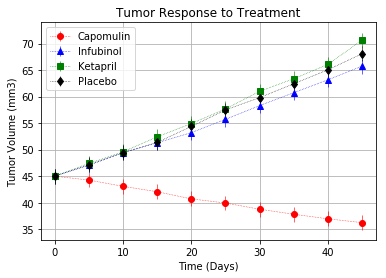

In [5]:
# Generate the Plot (with Error Bars)
    # axes
ax = plt.axes()
ax.set_xlim([-2, 47])
ax.set_ylim([33, 74])
ax.set_xticks([0,10,20,30,40])
ax.set_yticks([35,40,45,50,55,60,65,70])
ax.grid()
    # labels
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
    # We create plot chart
dy = 1.4
wd = 0.6
plt.errorbar(l_temp, l_capomulin, fmt="o:", yerr=dy, color="r",linewidth=wd)
plt.errorbar(l_temp, l_infubinol, fmt="^:", yerr=dy, color="b",linewidth=wd)
plt.errorbar(l_temp, l_ketapril, fmt="s:", yerr=dy, color="g",linewidth=wd)
plt.errorbar(l_temp, l_placebo, fmt="d:", yerr=dy, color="k",linewidth=wd)
    # We put legend in the chart
plt.legend(l_columns, loc=2)
# Save the Figure
plt.savefig("./Images/tumorResponseTreatment.png")
# Show the Figure
plt.show()

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
    # We creat a temporal dataframe for to capture grouped data
df_temp = df_clinicaTrialAnalize.loc[range(len(df_clinicaTrialAnalize)),["Timepoint", "Metastatic Sites", "Drug"]]
df_temp = df_temp[["Drug","Timepoint","Metastatic Sites"]]
df_temp.sort_values(["Drug","Timepoint"], ascending=[True,True])
df_MetMean = df_temp.groupby(["Drug","Timepoint"], as_index=True)["Metastatic Sites"].mean()

# Convert to DataFrame
df_MetMean = pd.DataFrame(df_MetMean)

# Preview DataFrame
df_MetMean.round({"Metastatic Sites":6})
df_MetMean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
    # We creat a temporal dataframe for to capture grouped data
df_temp = df_clinicaTrialAnalize.loc[range(len(df_clinicaTrialAnalize)),["Timepoint", "Metastatic Sites", "Drug"]]
df_temp = df_temp[["Drug","Timepoint","Metastatic Sites"]]
df_temp.sort_values(["Drug","Timepoint"], ascending=[True,True])
df_MetSem = df_temp.groupby(["Drug","Timepoint"], as_index=True)["Metastatic Sites"].sem()

# Convert to DataFrame
df_MetSem = pd.DataFrame(df_MetSem)

# Preview DataFrame
df_MetSem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Generate the Plot (with Error Bars)
try:
    df_MetMean = df_MetMean.reset_index(level=["Drug","Timepoint"])
except KeyError:
    print("Drug and Timepoint are not index now")

l_columns = pd.DataFrame(df_MetMean["Drug"])
l_columns = l_columns.drop_duplicates(keep='first')
l_columns = l_columns["Drug"].tolist()
    # We capture series per each column
l_capomulin = df_MetMean.loc[range(0,10),["Metastatic Sites"]]["Metastatic Sites"].tolist()
l_infubinol = df_MetMean.loc[range(10,20),["Metastatic Sites"]]["Metastatic Sites"].tolist()
l_ketapril = df_MetMean.loc[range(20,30),["Metastatic Sites"]]["Metastatic Sites"].tolist()
l_placebo = df_MetMean.loc[range(30,40),["Metastatic Sites"]]["Metastatic Sites"].tolist()
l_temp = df_MetMean.loc[range(0,10),["Timepoint"]]["Timepoint"].tolist()

# Preview that Reformatting worked
    # We create a new DataFrame with select data
df_ans4 = pd.DataFrame({l_columns[0]:l_capomulin, l_columns[1]:l_infubinol, l_columns[2]:l_ketapril, 
                        l_columns[3]:l_placebo, "Timepoint":l_temp})
df_ans4 = df_ans4.set_index("Timepoint")
df_ans4

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


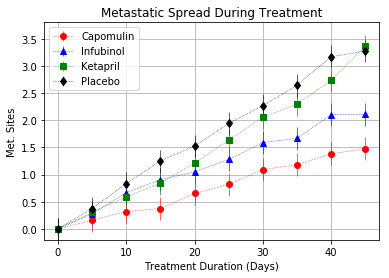

In [9]:
# Generate the Plot (with Error Bars)
    # axes
ax = plt.axes()
ax.set_xlim([-2, 47])
ax.set_ylim([-0.2, 3.8])
ax.set_xticks([0,10,20,30,40])
ax.set_yticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
ax.grid()
    # labels
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
    # We create plot chart
dy = 0.21
wd = 0.6
plt.errorbar(l_temp, l_capomulin, fmt="o:", yerr=dy, color="r",linewidth=wd)
plt.errorbar(l_temp, l_infubinol, fmt="^:", yerr=dy, color="b",linewidth=wd)
plt.errorbar(l_temp, l_ketapril, fmt="s:", yerr=dy, color="g",linewidth=wd)
plt.errorbar(l_temp, l_placebo, fmt="d:", yerr=dy, color="k",linewidth=wd)
    # We put legend in the chart
plt.legend(l_columns, loc="best")
# Save the Figure
plt.savefig("./Images/MetastaticSpreadDuringTreatment.png")
# Show the Figure
plt.show()

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
    # We creat a temporal dataframe for to capture grouped data
df_temp = df_clinicaTrialAnalize.loc[range(len(df_clinicaTrialAnalize)),["Mouse ID","Timepoint", "Drug"]]
df_temp = df_temp[["Drug","Timepoint","Mouse ID"]]
df_temp.sort_values(["Drug","Timepoint"], ascending=[True,True])
df_MiceCount = df_temp.groupby(["Drug","Timepoint"], as_index=True)["Mouse ID"].count()
df_MiceCount = df_MiceCount.reset_index(level=["Drug","Timepoint"])

# Convert to DataFrame
df_MiceCount = pd.DataFrame(df_MiceCount)
    # We change "Mouse ID" column name by "Mouse Count" column name
df_MiceCount.columns = ["Drug","Timepoint","Mouse Count"]

# Preview DataFrame
df_MiceCount.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
l_columns = pd.DataFrame(df_MiceCount["Drug"])
l_columns = l_columns.drop_duplicates(keep='first')
l_columns = l_columns["Drug"].tolist()
    # We capture series per each column
l_capomulin = df_MiceCount.loc[range(0,10),["Mouse Count"]]["Mouse Count"].tolist()
l_infubinol = df_MiceCount.loc[range(10,20),["Mouse Count"]]["Mouse Count"].tolist()
l_ketapril = df_MiceCount.loc[range(20,30),["Mouse Count"]]["Mouse Count"].tolist()
l_placebo = df_MiceCount.loc[range(30,40),["Mouse Count"]]["Mouse Count"].tolist()
l_temp = df_MiceCount.loc[range(0,10),["Timepoint"]]["Timepoint"].tolist()

    # We assume that first valur of list "l_capomulin" is the 100%
    # So, we create new list "l_capomulinPercentage" with each value of l_capomulin like percentage
l_capomulinPercentage = [ (x*100)/l_capomulin[0] for x in l_capomulin ] 
    # We do the same for each lista of serie (l_infubinol, l_ketapril, l_placebo)
l_infubinolPercentage = [ (x*100)/l_infubinol[0] for x in l_infubinol ] 
l_ketaprilPercentage = [ (x*100)/l_ketapril[0] for x in l_ketapril ]
l_placeboPercentage = [ (x*100)/l_placebo[0] for x in l_placebo ]

# Preview that Reformatting worked
    # We create a new DataFrame with select data
df_ans5 = pd.DataFrame({l_columns[0]:l_capomulin, l_columns[1]:l_infubinol, l_columns[2]:l_ketapril, 
                        l_columns[3]:l_placebo, "Timepoint":l_temp})
df_ans5 = df_ans5.set_index("Timepoint")
#df_ans5.to_csv("dfSurvivalMices.csv")
df_ans5

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


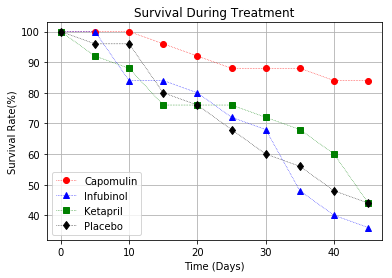

In [12]:
# Generate the Plot (Accounting for percentages)
ax = plt.axes()
ax.set_xlim([-2, 47])
ax.set_ylim([32, 103])
ax.set_xticks([0,10,20,30,40])
ax.set_yticks([40,50,60,70,80,90,100])
ax.grid()
    # labels
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate(%)')
plt.title('Survival During Treatment')
    # We create plot chart
wd = 0.6
plt.plot(l_temp, l_capomulinPercentage, "o:", color="r",linewidth=wd)
plt.plot(l_temp, l_infubinolPercentage, "^:", color="b",linewidth=wd)
plt.plot(l_temp, l_ketaprilPercentage, "s:", color="g",linewidth=wd)
plt.plot(l_temp, l_placeboPercentage, "d:", color="k",linewidth=wd)
    # We put legend in the chart
plt.legend(l_columns, loc="best")

# Save the Figure
plt.savefig("./Images/SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

In [13]:
# Calculate the percent changes for each drug
l_percentChangesEachDrug = [ percChangeCapomulin, percChangeInfubinol, percChangeKetapril, percChangePlacebo ]
df_finalAns = pd.DataFrame({"Drug":l_drugsToAnalize, "":l_percentChangesEachDrug})
df_finalAns.set_index("Drug", inplace = True)
# Display the data to confirm
print(df_finalAns)

                    
Drug                
Capomulin -19.475303
Infubinol  46.123472
Ketapril   57.028795
Placebo    51.297960


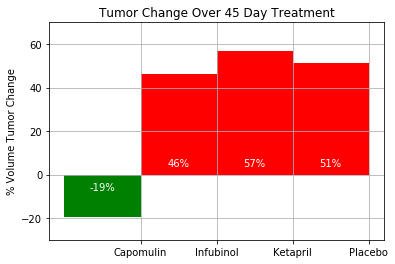

In [14]:
import matplotlib.pyplot as fig
%matplotlib inline

# Store all Relevant Percent Changes into a Tuple
t_percentChangesEachDrug = tuple(l_percentChangesEachDrug)

# Splice the data between passing and failing drugs
    # Answer --> I did it into l_percentChangesEachDrug

# Orient widths. Add labels, tick marks, etc. 
    # axes
ax = fig.axes()
    # tick marks
ax.set_xlim([-1.2, 3.2])
ax.set_ylim([-30, 70])
fig.xticks(np.arange(4),l_drugsToAnalize)
ax.set_yticks([-20,0,20,40,60])
ax.grid()
    # labels
fig.ylabel('% Volume Tumor Change')
fig.title('Tumor Change Over 45 Day Treatment')
    # Widths
stdWidth = -1.0
l_widths = [stdWidth, stdWidth, stdWidth, stdWidth]
    # Colors
l_colors = ['g', 'r', 'r', 'r']

# Use functions to label the percentages of changes
style = dict(size=10, color='white')
strPercCapomulin = "{0}%".format(int(l_percentChangesEachDrug[0]))
strPercInfubinol = "{0}%".format(int(l_percentChangesEachDrug[1]))
strPerKetapril = "{0}%".format(int(l_percentChangesEachDrug[2]))
strPerPlacebo = "{0}%".format(int(l_percentChangesEachDrug[3]))
ax.text(-0.5, -7, strPercCapomulin, ha='center', **style)
ax.text(0.5, 4, strPercInfubinol, ha='center', **style)
ax.text(1.5, 4, strPerKetapril, ha='center', **style)
ax.text(2.5, 4, strPerPlacebo, ha='center', **style)


# Call functions to implement the function calls
fig.bar(np.arange(4), t_percentChangesEachDrug, width = l_widths, color = l_colors, align='edge')

# Save the Figure
fig.savefig("./Images/TumorChangeOver45DayTreatment.png")

# Show the Figure
fig.show()